In [1]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('all_data.csv')

In [16]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
data.shape

(96, 4)

In [5]:
data.tail()

,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [6]:
data.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [7]:
data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [26]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [13]:
data.isnull().values.any()

False

In [10]:
data.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

### Make the colums accessbile with quick accesss

In [21]:
# camel_case = lambda col: col.replace(" ", "_")
# data.columns = map(camel_case, data.columns)
data.columns = data.columns.str.replace(" ", "_").str.lower()
data.rename(columns={"life_expectancy_at_birth_(years)": "life_expectancy"}, inplace=True)
data.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [32]:
data[['country', 'life_expectancy', 'gdp']].groupby('country').mean().reset_index()

,country,life_expectancy,gdp
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

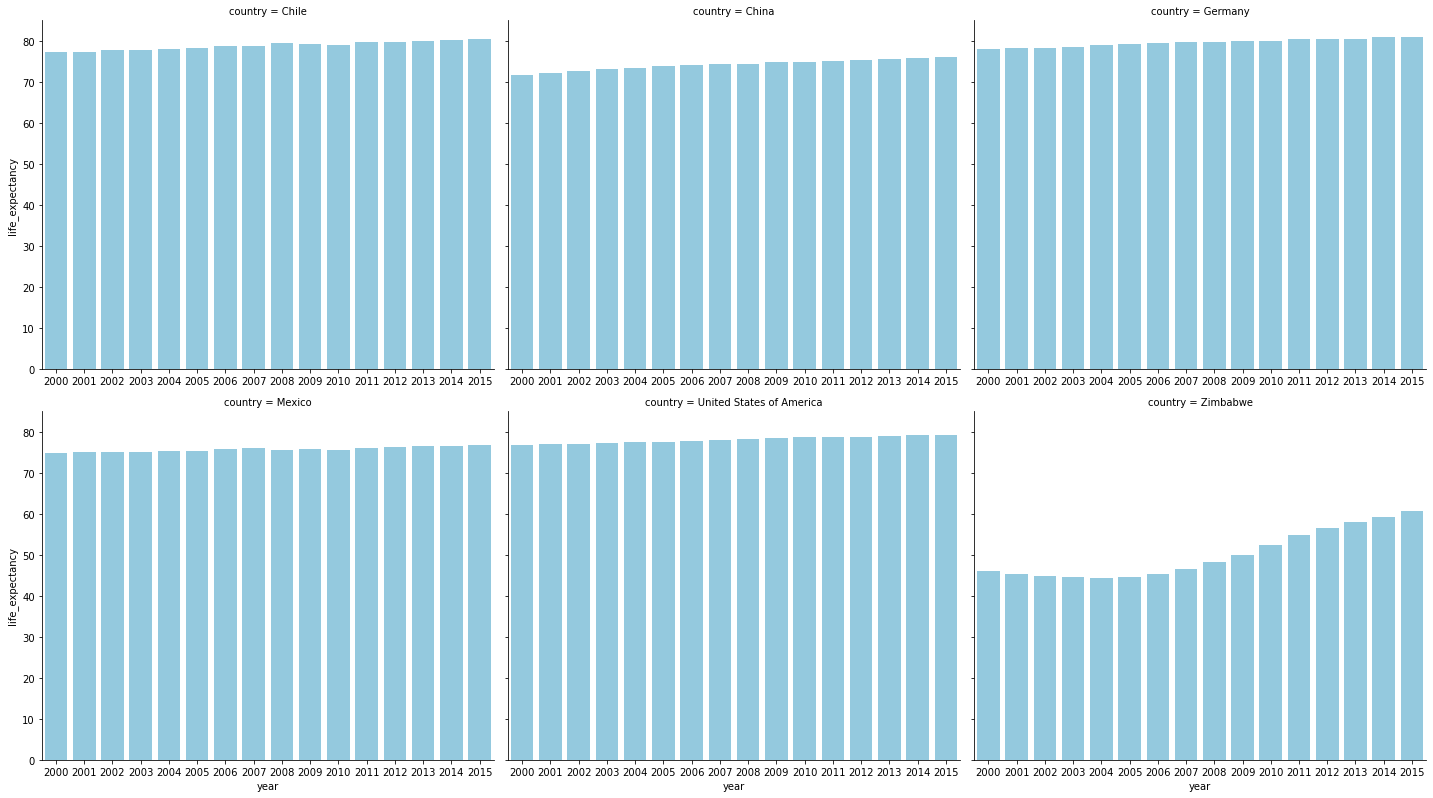

In [55]:
sns.catplot(x='year',y='life_expectancy', col='country', data=data, kind='bar', col_wrap=3, color='skyblue', height=5.5, aspect=1.2, sharex=False)
plt.show()

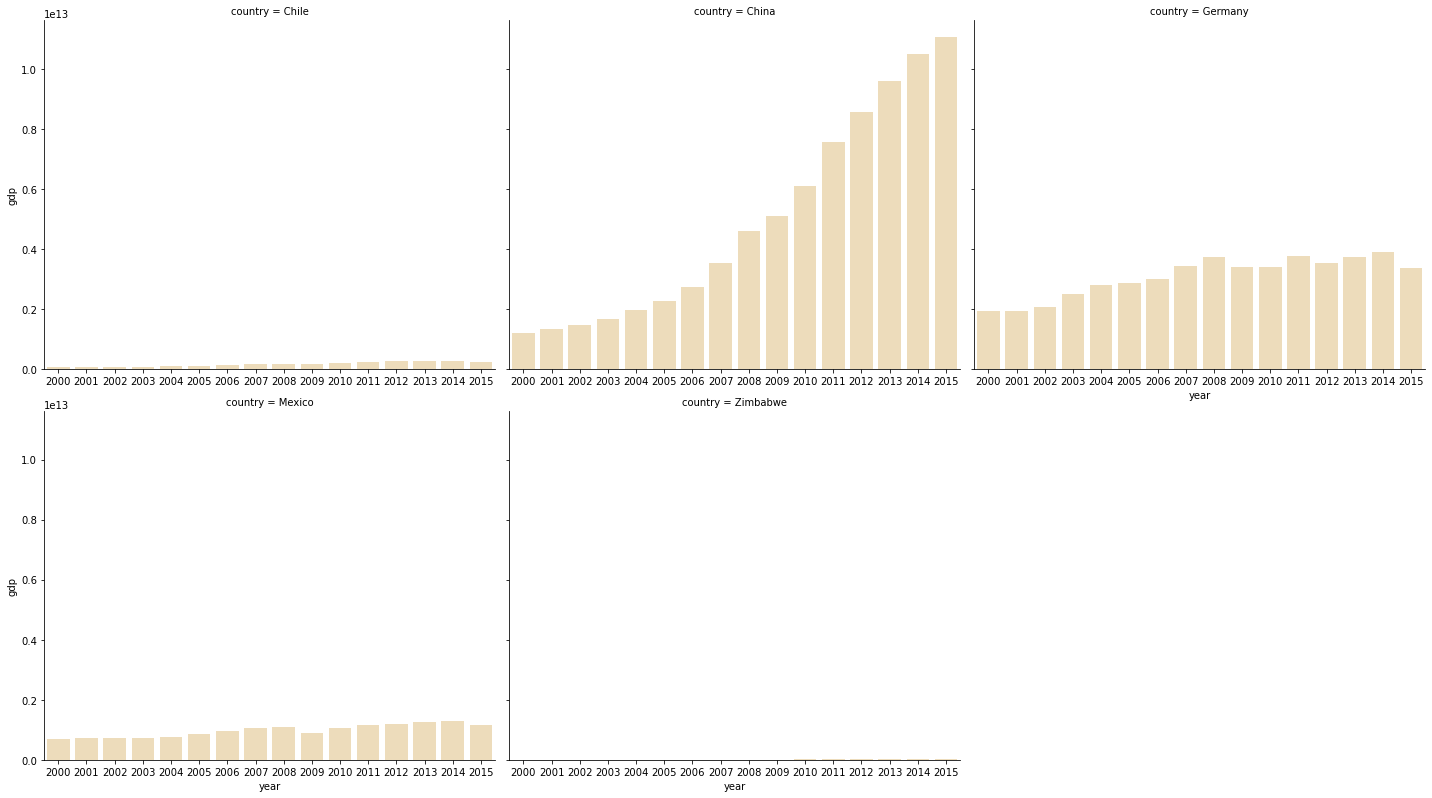

In [59]:
sns.catplot(x='year',y='gdp', col='country', data=data[data.country != "United States of America"], kind='bar', col_wrap=3, color='wheat', height=5.5, aspect=1.2, sharex=False)
plt.show()

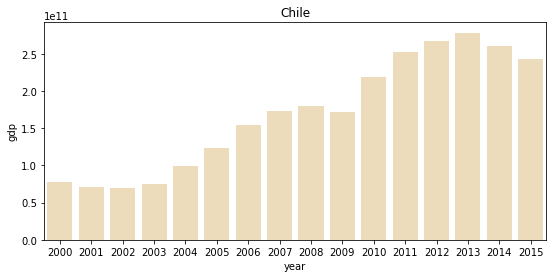

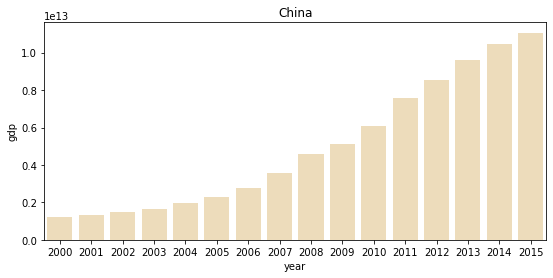

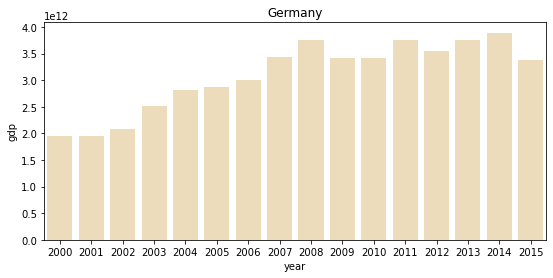

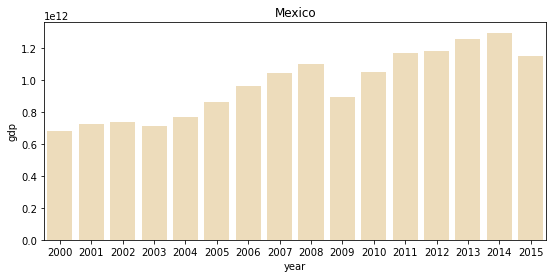

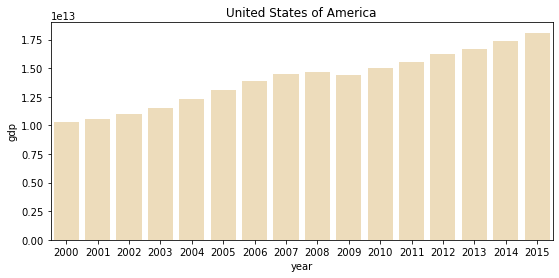

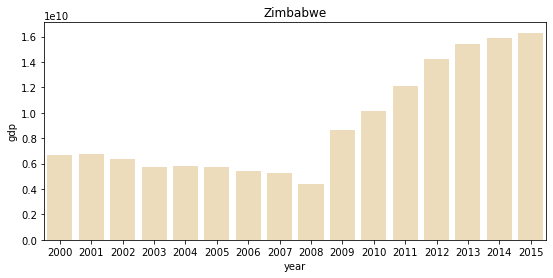

In [68]:
for country_name in data.country.unique():
    plt.figure(figsize=(9,4))
    sns.barplot(x='year', y='gdp', data=data[data.country == country_name], color='wheat').set_title(country_name)
    plt.show()

Below is a regex that matches various phone number formatting

In [13]:
# (^1 \d{3}|^\(?\d{3}\)?)[\.-\s]?\d{3}[\.-\s]?\d{4}
phone_pattern = "(^1 \d{3}|^\(?\d{3}\)?)[\.-\s]?\d{3}[\.-\s]?\d{4}"

In [14]:
phone_numbers = ['718-555-3810', '9175552849', '1 212 555 3821', '(917)5551298', '212.555.8731']

In [15]:
import regex

In [16]:
regex.match(phone_pattern, phone_numbers[0])

<regex.Match object; span=(0, 12), match='718-555-3810'>

In [17]:
for number in phone_numbers:
    valid_number = regex.match(phone_pattern, number)
    if valid_number:
        print(f"Valid number {valid_number[0]}")

Valid number 718-555-3810
Valid number 9175552849
Valid number 1 212 555 3821
Valid number (917)5551298
Valid number 212.555.8731
